In [1]:
import tensorflow as tf

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [12]:
X_train_full.dtype

dtype('uint8')

In [31]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [11]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [13]:
X_train.dtype

dtype('float64')

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### First, set TensorFlow’s random seed to make the results reproducible: the random weights of the hidden layers and the output layer will be the same every time you run the notebook. You could also choose to use the tf.keras.utils.set_random_seed() function, which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

In [15]:
tf.random.set_seed(41)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.layers

In [19]:
input_layer =  model.layers[0]

In [20]:
input_layer.name

'flatten'

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
weights, biases = model.layers[1].get_weights()
weights.shape

(784, 128)

### Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry, as discussed earlier), and the biases were initialized to zeros, which is fine. If you want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer. We’ll discuss initializers further in Chapter 11, and the full list is at https://keras.io/api/layers/initializers.

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
weights[0]

array([-0.0551507 ,  0.0364093 ,  0.0557347 ,  0.03426004, -0.02769509,
       -0.04227511,  0.0278364 , -0.04445579,  0.01515105, -0.07410561,
        0.07043415, -0.0265118 , -0.06861024, -0.02212292, -0.0785609 ,
        0.07688569, -0.05032754,  0.05693572,  0.01820303,  0.03622933,
        0.07425315,  0.00540339, -0.03546499, -0.04090339, -0.0260313 ,
        0.07653388,  0.03058327, -0.01798005, -0.069149  , -0.06815404,
       -0.03718014,  0.00824341,  0.01804892, -0.06531727,  0.02762944,
        0.05257899, -0.04966006, -0.01954021, -0.0503987 ,  0.05956519,
        0.04882415,  0.02874965, -0.01600275, -0.01921773,  0.07708459,
       -0.0033037 ,  0.0702818 ,  0.01840672,  0.04798595, -0.00042012,
       -0.02634273,  0.05399401, -0.01445433, -0.0288523 , -0.0627787 ,
       -0.06674603,  0.05524515,  0.0798068 ,  0.0162872 ,  0.01778843,
        0.06823722,  0.07433177,  0.0533487 , -0.01979319,  0.00674619,
       -0.06700505,  0.04792484, -0.07879615, -0.07967573, -0.03

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8218 - val_loss: 0.4298 - val_accuracy: 0.8394
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3731 - accuracy: 0.8625 - val_loss: 0.3649 - val_accuracy: 0.8610
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8757 - val_loss: 0.3423 - val_accuracy: 0.8738
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8834 - val_loss: 0.3545 - val_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.8910 - val_loss: 0.3329 - val_accuracy: 0.8798
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8951 - val_loss: 0.3227 - val_accuracy: 0.8856
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2700 - accuracy: 0.8986 - val_loss: 0.3274 - val_accurac

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
import pandas as pd

In [38]:
hist_data = pd.DataFrame(history.history)

<Axes: title={'center': 'Performance'}, xlabel='epoch'>

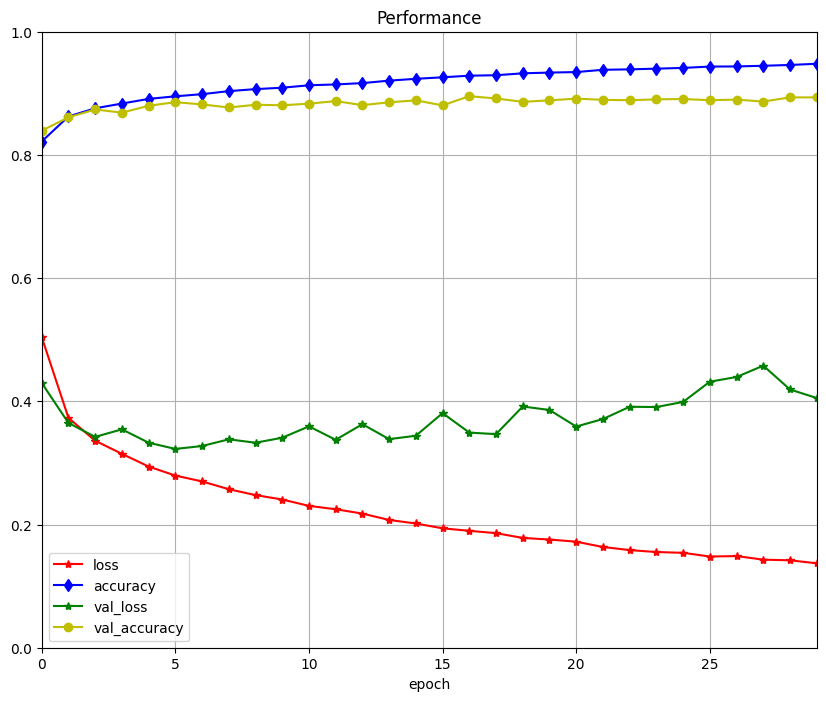

In [44]:
hist_data.plot(figsize=(10,8), xlim=[0, 29], ylim = [0, 1], grid=True, xlabel='epoch', style=['r-*', 'b-d', 'g-*', 'y-o'], title='Performance')

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4144 - accuracy: 0.8911


[0.4143948256969452, 0.8910999894142151]

In [50]:
x_new = X_test[:3]
y_prob = model.predict(x_new)

1/1 [==============================] - 0s 21ms/step


In [51]:
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [70]:
y_pred = y_prob.argmax(axis = -1)

In [71]:
y_pred

array([9, 2, 1], dtype=int64)

### 
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [67]:
y_pred_t = y_prob.argmax(axis=0) #  indexs of rows are considered to take max
#like above matrix [0, 0, 0,] ; [0, 0, 1]; [0, 1, 0]
# so the output is [1, 2, 1] 
y_pred_t

array([1, 2, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

# np.argmax(axis=0) --> above matrix size is 3*10, ignores axis given axis=0 means row, so it checks column wise for 10 times.
# np.argmax(axis=-1) --> it will check for max for 3 times

In [57]:
print(f'Dimension of y_prob: {y_prob.ndim}')
print(f'Shape of y_prob : {y_prob.shape}')

Dimension of y_prob: 2
Shape of y_prob : (3, 10)


In [58]:
print(f'Dimension of y_pred: {y_pred.ndim}')
print(f'Shape of y_pred : {y_pred.shape}')

Dimension of y_pred: 1
Shape of y_pred : (3,)


### Notes about np.argmax(axis=-1)
This means that the index that will be returned by argmax will be taken from the last axis.

Your data has some shape (20,19,5,80), I changed the first dimension just to make it clearer. This means:

Axis 0 = 20 elements
Axis 1 = 19 elements
Axis 2 = 5 elements
Axis 3 = 80 elements
Now, negative numbers work exactly like in python lists, in numpy arrays, etc. Negative numbers represent the inverse order:

Axis -1 = 80 elements
Axis -2 = 5 elements
Axis -3 = 19 elements
Axis -4 = 20 elements
When you pass the axis parameter to the argmax function, the indices returned will be based on this axis. Your results will lose this specific axes, but keep the others.

See what shape argmax will return for each index:

K.argmax(a,axis= 0 or -4) returns (19,5,80) with values from 0 to 19
K.argmax(a,axis= 1 or -3) returns (20,5,80) with values from 0 to 18
K.argmax(a,axis= 2 or -2) returns (20,19,80) with values from 0 to 4
K.argmax(a,axis= 3 or -1) returns (20,19,5) with values from 0 to 79

In [72]:
import numpy as np
class_names = np.array(class_names)
class_names[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [74]:
class_names[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Keras regression model for hosue price prediction for california house

In [79]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=10)

norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model_1 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)

history_1 = model_1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test  = model_1.evaluate(X_test, y_test)
  

Epoch 1/20
516/516 [==============================] - 1s 1ms/step - loss: 0.7201 - root_mean_squared_error: 0.8486 - val_loss: 0.6349 - val_root_mean_squared_error: 0.7968
Epoch 2/20
516/516 [==============================] - 0s 941us/step - loss: 0.3794 - root_mean_squared_error: 0.6160 - val_loss: 0.5914 - val_root_mean_squared_error: 0.7690
Epoch 3/20
516/516 [==============================] - 0s 966us/step - loss: 0.3564 - root_mean_squared_error: 0.5970 - val_loss: 0.5114 - val_root_mean_squared_error: 0.7151
Epoch 4/20
516/516 [==============================] - 0s 919us/step - loss: 0.3324 - root_mean_squared_error: 0.5765 - val_loss: 0.5413 - val_root_mean_squared_error: 0.7358
Epoch 5/20
516/516 [==============================] - 0s 915us/step - loss: 0.3187 - root_mean_squared_error: 0.5645 - val_loss: 0.6082 - val_root_mean_squared_error: 0.7799
Epoch 6/20
516/516 [==============================] - 0s 922us/step - loss: 0.3096 - root_mean_squared_error: 0.5564 - val_loss: 0.5

In [81]:
y_pred = model_1.predict(X_test[:3])
y_pred

1/1 [==============================] - 0s 51ms/step


array([[0.6007872],
       [1.1968365],
       [4.023564 ]], dtype=float32)

In [83]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

 ## why 17 params in Normalization layer ?
The Normalization layer most likely stores statistics like mean and variance for each of the 8 input features.
Typically, for a dataset with n features, the normalization layer computes 2 parameters per feature:
Mean for each feature (8 parameters)
Variance for each feature (8 parameters)
In addition, there might be a small additional parameter for scaling or offset, bringing the total to 17 non-trainable parameters in this case.

In [84]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_15 (Dense)            (None, 50)                450       
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
__________________

In [85]:
X_train.shape

(16502, 8)

### Building Complex Models Using the Functional API
One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al.⁠15 It connects all or part of the inputs directly to the output laye3. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)


In [90]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(50, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')

concat_layer = tf.keras.layers.Concatenate()

output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

concat = concat_layer([hidden2, normalized])

output_ = output_layer(concat)

model_3 = tf.keras.Model(inputs=[input_], outputs=[output_])

In [91]:
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization_8 (Normaliza  (None, 8)                    17        ['input_5[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense_31 (Dense)            (None, 50)                   450       ['normalization_8[0][0]']     
                                                                                                  
 dense_32 (Dense)            (None, 30)                   1530      ['dense_31[0][0]']        